<h2>Maven Rewards Challenge:</h2>

<h3>Challenge Objective:</h3>
For the Maven Rewards Challenge, you’ll play the role of a Sr. Marketing Analyst at Maven Cafe.

You've just run a test by sending different combinations of promotional offers to existing rewards members. Now that the 30-day period for the test has concluded, your task is to identify key customer segments and develop a data-driven strategy for future promotional messaging & targeting.

The results need to be summarized in a report that will be presented to the CMO.

<h3>Cafe Rewards Offers:</h3>
Data that simulates the behavior of Cafe Rewards members over a 30-day period, including their transactions and responses to promotional offers.

Customers receive offers once every few days and have a limited time to redeem them. These can be informational offers (simple advertisement of a product), discount offers, or "buy one, get one" (BOGO) offers. Each customer receives a different mix of offers, attempting to maximize their probability of making a purchase.

Every customer purchase during the period is marked as a transaction. For a transaction to be attributed to an offer, it must occur at the same time as when the offer was "completed" by the customer.

In [44]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
# read all the datasets
customers = pd.read_csv("customersNew.csv")
income_customers = pd.read_csv("IncomeCustomers.csv")
no_income_customers = pd.read_csv("NoIncomeCustomers.csv")
events = pd.read_csv("eventsNew.csv")
offers = pd.read_csv("offersNew.csv")

In [46]:
# No. of records and features in each dataset
print("Customers data:", customers.shape)
print("Customer's with Income data:", income_customers.shape)
print("Customer's with No Income data:", no_income_customers.shape)
print("Events data:", events.shape)
print("Offers data:", offers.shape)

Customers data: (17000, 8)
Customer's with Income data: (14825, 8)
Customer's with No Income data: (2175, 8)
Events data: (306534, 7)
Offers data: (10, 6)


<h4>Data Dictionary:</h4>

<b>Customers: </b>Demographic data for each member

 - customer_id: Unique customer ID (primary key)
 - became_member_on: Date when the customer created their account (yyyymmdd)
 - gender: Customer's gender: (M)ale, (F)emale, or (O)ther
 - age: Customer's age
 - income: Customer's estimated annual income, in USD

<b>Events: </b>Data on customer activity, with records for transactions, offers received, offers viewed, and offers completed

 - customer_id: Customer the event is associated with  (foreign key)
 - event: Description of the event (transaction, offer received, offer viewed, or offer completed)
 - value: Dictionary of values associated with the event (amount for transactions, offer_id for offers received and viewed, and offer_id & reward for offers completed).
 - time: Hours passed in the 30-day period (starting at 0)

<b>Offers: </b>Details on the offers sent to customers during the 30-day period

 - offer_id: Unique offer ID (primary key)
 - offer_type: type of offer: bogo (buy one, get one), discount, or informational
 - difficulty: minimum amount required to spend in order to be able to complete the offer
 - reward: reward (in dollars) obtained by completing the offer
 - duration: days a customer has to complete the offer once they have received it
 - channels: list of marketing channels used to send the offer to customers

In [47]:
# Customer data
customers.head()

,customer_id,became_member_on,gender,age,income,member_Year,member_Month,member_Date
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN,2017,2,12
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0,2017,7,15
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN,2018,7,12
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0,2017,5,9
4,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN,2017,8,4


In [48]:
# Customer's with Income data
income_customers.head()

,customer_id,became_member_on,gender,age,income,member_Year,member_Month,member_Date
0,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0,2017,7,15
1,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0,2017,5,9
2,e2127556f4f64592b11af22de27a7932,20180426,M,68,70000.0,2018,4,26
3,389bc3fa690240e798340f5a15918d5c,20180209,M,65,53000.0,2018,2,9
4,2eeac8d8feae4a8cad5a6af0499a211d,20171111,M,58,51000.0,2017,11,11


In [49]:
# Customer's with No Income data
no_income_customers.head()

,customer_id,became_member_on,gender,age,income,member_Year,member_Month,member_Date
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN,2017,2,12
1,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN,2018,7,12
2,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN,2017,8,4
3,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN,118,NaN,2017,9,25
4,68617ca6246f4fbc85e91a2a49552598,20171002,NaN,118,NaN,2017,10,2


In [50]:
# Events data
events.head()

,customer_id,event,value,time,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [51]:
# Offers data
offers.head(10)

,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,E|M|S
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,W|E|M|S
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,W|E|M
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,W|E|M
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,W|E
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7,3,7,W|E|M|S
6,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,10,W|E|M|S
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,E|M|S
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,5,W|E|M|S
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,W|E|M


In [52]:
# check datatypes
customers.dtypes

customer_id          object
became_member_on      int64
gender               object
age                   int64
income              float64
member_Year           int64
member_Month          int64
member_Date           int64
dtype: object

In [53]:
# drop column became_member_on, change income to int, member_Year / member_Date to object, member_Month to actual month name
customers.drop(["became_member_on"], axis=1, inplace=True)

customers['member_Year'] = customers['member_Year'].astype('object')
customers['member_Date'] = customers['member_Date'].astype('object')

customers['member_Month'] = customers['member_Month'].replace({
    1:"January", 2: "February", 3: "March", 4:"April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})

customers.head()

,customer_id,gender,age,income,member_Year,member_Month,member_Date
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,118,NaN,2017,February,12
1,0610b486422d4921ae7d2bf64640c50b,F,55,112000.0,2017,July,15
2,38fe809add3b4fcf9315a9694bb96ff5,NaN,118,NaN,2018,July,12
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,100000.0,2017,May,9
4,a03223e636434f42ac4c3df47e8bac43,NaN,118,NaN,2017,August,4


In [54]:
income_customers.dtypes

customer_id          object
became_member_on      int64
gender               object
age                   int64
income              float64
member_Year           int64
member_Month          int64
member_Date           int64
dtype: object

In [55]:
# drop column became_member_on, change income to int, member_Year / member_Date to object, member_Month to actual month name
income_customers.drop(["became_member_on"], axis=1, inplace=True)

income_customers['member_Year'] = income_customers['member_Year'].astype('object')
income_customers['member_Date'] = income_customers['member_Date'].astype('object')

income_customers['member_Month'] = income_customers['member_Month'].replace({
    1:"January", 2: "February", 3: "March", 4:"April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})

income_customers.head()

,customer_id,gender,age,income,member_Year,member_Month,member_Date
0,0610b486422d4921ae7d2bf64640c50b,F,55,112000.0,2017,July,15
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,100000.0,2017,May,9
2,e2127556f4f64592b11af22de27a7932,M,68,70000.0,2018,April,26
3,389bc3fa690240e798340f5a15918d5c,M,65,53000.0,2018,February,9
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,51000.0,2017,November,11


In [56]:
no_income_customers.dtypes

customer_id          object
became_member_on      int64
gender              float64
age                   int64
income              float64
member_Year           int64
member_Month          int64
member_Date           int64
dtype: object

In [57]:
# drop column became_member_on / gender / age / income, change income to int, member_Year / member_Date to object, member_Month to actual month name
no_income_customers.drop(["became_member_on", "gender", "age", "income"], axis=1, inplace=True)

no_income_customers['member_Year'] = no_income_customers['member_Year'].astype('object')
no_income_customers['member_Date'] = no_income_customers['member_Date'].astype('object')

no_income_customers['member_Month'] = no_income_customers['member_Month'].replace({
    1:"January", 2: "February", 3: "March", 4:"April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})

no_income_customers.head()

,customer_id,member_Year,member_Month,member_Date
0,68be06ca386d4c31939f3a4f0e3dd783,2017,February,12
1,38fe809add3b4fcf9315a9694bb96ff5,2018,July,12
2,a03223e636434f42ac4c3df47e8bac43,2017,August,4
3,8ec6ce2a7e7949b1bf142def7d0e0586,2017,September,25
4,68617ca6246f4fbc85e91a2a49552598,2017,October,2


In [58]:
events.dtypes

customer_id     object
event           object
value           object
time             int64
amount         float64
offer_id        object
reward         float64
dtype: object

In [59]:
# drop the column value
events.drop(["value"], axis=1, inplace=True)

events.head()

,customer_id,event,time,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [60]:
offers.dtypes

offer_id      object
offer_type    object
difficulty     int64
reward         int64
duration       int64
channels      object
dtype: object

In [61]:
# descriptive statistics
customers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,17000,17000,68be06ca386d4c31939f3a4f0e3dd783,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,14825,3,M,8484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,17000.0,NaN,NaN,NaN,62.531412,26.73858,18.0,45.0,58.0,73.0,118.0
income,14825.0,NaN,NaN,NaN,65404.991568,21598.29941,30000.0,49000.0,64000.0,80000.0,120000.0
member_Year,17000.0,6.0,2017.0,6469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_Month,17000,12,August,1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_Date,17000.0,31.0,25.0,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
income_customers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,14825,14825,0610b486422d4921ae7d2bf64640c50b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,14825,3,M,8484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,14825.0,NaN,NaN,NaN,54.393524,17.383705,18.0,42.0,55.0,66.0,101.0
income,14825.0,NaN,NaN,NaN,65404.991568,21598.29941,30000.0,49000.0,64000.0,80000.0,120000.0
member_Year,14825.0,6.0,2017.0,5599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_Month,14825,12,August,1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_Date,14825.0,31.0,25.0,535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
no_income_customers.describe(include='all').T

,count,unique,top,freq
customer_id,2175,2175,68be06ca386d4c31939f3a4f0e3dd783,1
member_Year,2175,6,2017,870
member_Month,2175,12,September,216
member_Date,2175,31,13,89


In [64]:
events.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,306534,17000,94de646f7b6041228ca7dec82adb97d2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,306534,4,transaction,138953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,306534.0,NaN,NaN,NaN,366.38294,200.326314,0.0,186.0,408.0,528.0,714.0
amount,138953.0,NaN,NaN,NaN,12.777356,30.250529,0.05,2.78,8.89,18.07,1062.28
offer_id,167581,10,fafdcd668e3743c1bb461111dcafc2a4,20241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reward,33579.0,NaN,NaN,NaN,4.904137,2.886647,2.0,2.0,5.0,5.0,10.0


In [65]:
offers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_id,10,10,ae264e3637204a6fb9bb56bc8210ddfd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offer_type,10,3,bogo,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty,10.0,NaN,NaN,NaN,7.7,5.831905,0.0,5.0,8.5,10.0,20.0
reward,10.0,NaN,NaN,NaN,4.2,3.583915,0.0,2.0,4.0,5.0,10.0
duration,10.0,NaN,NaN,NaN,6.5,2.321398,3.0,5.0,7.0,7.0,10.0
channels,10,4,W|E|M|S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# concise information of each datasets
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   17000 non-null  object 
 1   gender        14825 non-null  object 
 2   age           17000 non-null  int64  
 3   income        14825 non-null  float64
 4   member_Year   17000 non-null  object 
 5   member_Month  17000 non-null  object 
 6   member_Date   17000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 929.8+ KB


In [67]:
income_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   14825 non-null  object 
 1   gender        14825 non-null  object 
 2   age           14825 non-null  int64  
 3   income        14825 non-null  float64
 4   member_Year   14825 non-null  object 
 5   member_Month  14825 non-null  object 
 6   member_Date   14825 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 810.9+ KB


In [68]:
no_income_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   2175 non-null   object
 1   member_Year   2175 non-null   object
 2   member_Month  2175 non-null   object
 3   member_Date   2175 non-null   object
dtypes: object(4)
memory usage: 68.1+ KB


In [69]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  306534 non-null  object 
 1   event        306534 non-null  object 
 2   time         306534 non-null  int64  
 3   amount       138953 non-null  float64
 4   offer_id     167581 non-null  object 
 5   reward       33579 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ MB


In [70]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   offer_id    10 non-null     object
 1   offer_type  10 non-null     object
 2   difficulty  10 non-null     int64 
 3   reward      10 non-null     int64 
 4   duration    10 non-null     int64 
 5   channels    10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [71]:
# check for duplicate records
customers.duplicated().sum()

0

In [72]:
income_customers.duplicated().sum()

0

In [73]:
no_income_customers.duplicated().sum()

0

In [74]:
events.duplicated().sum()

397

In [75]:
events.drop_duplicates(inplace=True)

In [76]:
offers.duplicated().sum()

0

In [77]:
# check for null / missing values
customers.isnull().sum()

customer_id        0
gender          2175
age                0
income          2175
member_Year        0
member_Month       0
member_Date        0
dtype: int64

In [78]:
income_customers.isnull().sum()

customer_id     0
gender          0
age             0
income          0
member_Year     0
member_Month    0
member_Date     0
dtype: int64

In [79]:
no_income_customers.isnull().sum()

customer_id     0
member_Year     0
member_Month    0
member_Date     0
dtype: int64

In [80]:
events.isnull().sum()

customer_id         0
event               0
time                0
amount         167184
offer_id       138953
reward         272955
dtype: int64

In [81]:
offers.isnull().sum()

offer_id      0
offer_type    0
difficulty    0
reward        0
duration      0
channels      0
dtype: int64

We will keep null/missing values as it is as it depends on the event column for events data. As we are analyzing income and no income customers separately so we don't have to worry about it for customers data. We will only extract general insights from customers data.

<h4>Exploratory Data Analysis: Univariate Analysis</h4>

In [83]:
# Total Customers
print("Total Customer's at Maven Cafe:", customers['customer_id'].nunique())

# Customer's with Income
print("Customer's with Income at Maven Cafe:", income_customers['customer_id'].nunique())

# Customer's with No Income
print("Customer's with No Income at Maven Cafe:", no_income_customers['customer_id'].nunique())

# Offer Types
print("Types of Offers at Maven Cafe:", offers['offer_type'].unique())

# Marketing Channels
print("Marketing Channels used by Maven Cafe:", offers['channels'].unique())

Total Customer's at Maven Cafe: 17000
Customer's with Income at Maven Cafe: 14825
Customer's with No Income at Maven Cafe: 2175
Types of Offers at Maven Cafe: ['bogo' 'informational' 'discount']
Marketing Channels used by Maven Cafe: ['E|M|S' 'W|E|M|S' 'W|E|M' 'W|E']


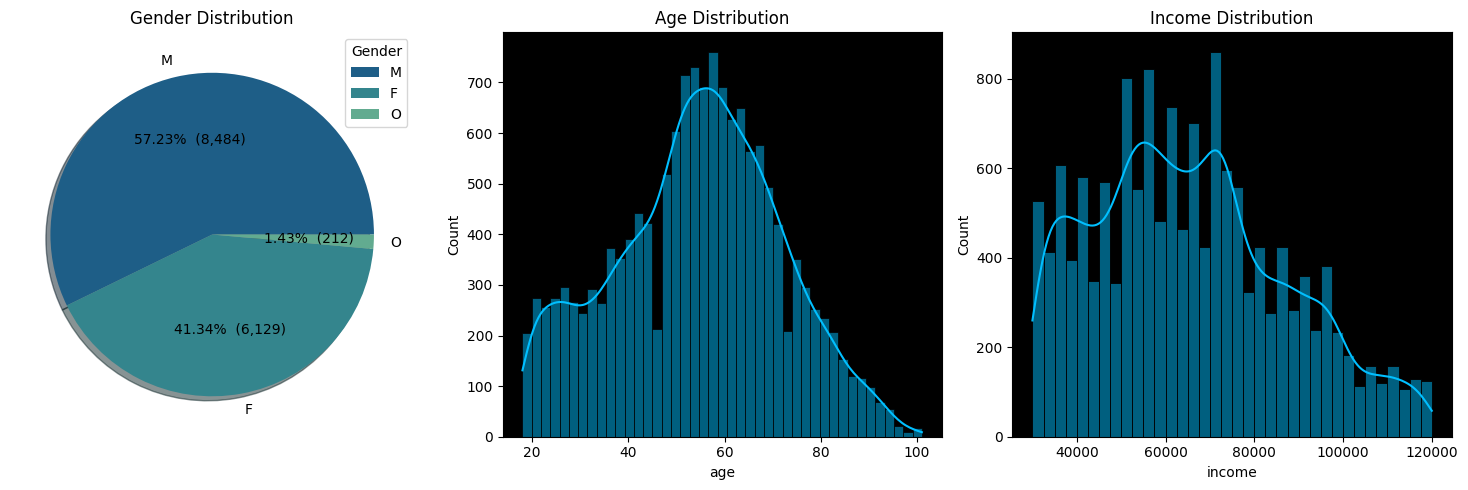

In [84]:
# Gender, Age & Income Distribution for Customer's with Income
plt.figure(figsize=(15,5))

# Gender Distribution

ax1 = plt.subplot2grid((1,3), (0,0))

palette1 = sns.color_palette("crest_r", len(income_customers['gender'].unique()))
dataGender = income_customers['gender'].value_counts().values
labelsGender = income_customers['gender'].value_counts().index

plt.pie(x=dataGender, labels=labelsGender, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataGender)/100), colors=palette1, shadow=True)
plt.legend(labelsGender, loc='upper right', title='Gender')
plt.title("Gender Distribution")

# Age Distribution

ax2 = plt.subplot2grid((1,3), (0,1))

ax2.set_facecolor('black')
sns.histplot(data=income_customers, x='age', kde=True, color='deepskyblue', ax=ax2)
plt.title("Age Distribution")

# Income Distribution

ax3 = plt.subplot2grid((1,3), (0,2))

ax3.set_facecolor('black')
sns.histplot(data=income_customers, x='income', kde=True, color='deepskyblue', ax=ax3)
plt.title("Income Distribution")

plt.tight_layout()
plt.show()

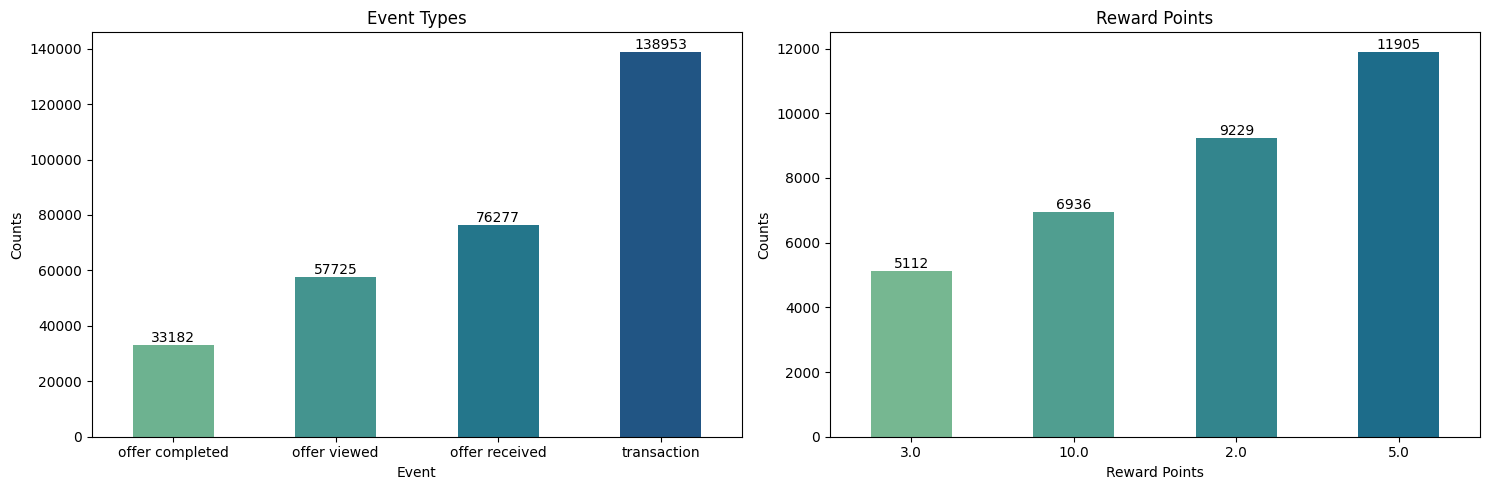

In [85]:
# event type, reward points
plt.figure(figsize=(15,5))

palette1 = sns.color_palette("crest", len(events['event'].unique()))
palette2 = sns.color_palette("crest", len(events['reward'].unique()))

# event type

ax1 = plt.subplot2grid((1,2),(0,0))

events['event'].value_counts().sort_values(ascending=True).plot(kind='bar', xlabel='Event', ylabel='Counts', color=palette1, ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.xticks(rotation=0)
plt.title("Event Types")

# reward points

ax2 = plt.subplot2grid((1,2),(0,1))

events['reward'].value_counts().sort_values(ascending=True).plot(kind='bar', xlabel='Reward Points', ylabel='Counts', color=palette2, ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.xticks(rotation=0)    
plt.title("Reward Points")

plt.tight_layout()
plt.show()

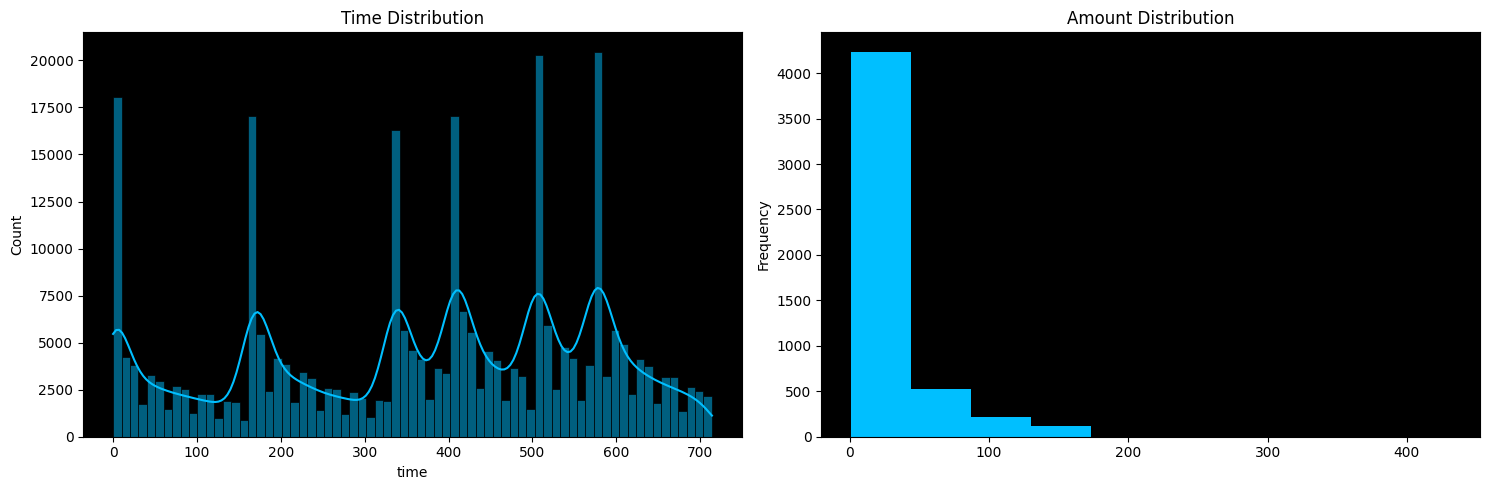

In [86]:
# time, amount
plt.figure(figsize=(15,5))

# Time Distribution

ax1 = plt.subplot2grid((1,2), (0,0))

ax1.set_facecolor('black')
sns.histplot(data=events, x='time', kde=True, color='deepskyblue', ax=ax1)
plt.title("Time Distribution")

# Amount Distribution

ax2 = plt.subplot2grid((1,2), (0,1))

ax2.set_facecolor('black')
events['amount'].value_counts().plot(kind='hist', color='deepskyblue', ax=ax2)
plt.title("Amount Distribution")

plt.tight_layout()
plt.show()

<h4>Univariate Analysis Summary:</h4>

 - Customer Demographics:

    - Total Customers: 17,000
    - Income Distribution: 14,825 customers with income data; 2,175 without income data

 - Gender Distribution:
    - Males: 57.23% (8,484)
    - Females: 41.34% (6,129)
    - Others: 1.43% (212)
    - Age Range: Predominantly between 45-65 years

 - Offer Analysis:

    - Types of Offers: BOGO, Informational, Discount
    - Marketing Channels: Combination of Email, Mobile, Social Media, Web

 - Event Engagement:

    - Transactions: 138,953
    - Offers Received: 76,277
    - Offers Viewed: 57,725
    - Offers Completed: 33,182

 - Reward Points Distribution:

    - 5 points: 11,905
    - 2 points: 9,229
    - 10 points: 6,936
    - 3 points: 5,112

 - Transaction Insights:

    - Time Peaks: Transactions peaked at specific intervals (0, 160, 340, 410, 510, 580 hours)
    - Transaction Amounts: Majority of transactions were under $50

 - Now, we have to join our datasets to gain insights using Bivariate and Multivariate Analysis
 - We will join no_income_customers and income_customers separately to derive insights from these data
 - For this, we have to join offers to events and then income_customers and no_income_customers

In [96]:
# Join income_customers on events
data1 = pd.merge(left=events, right=income_customers, how='inner', on='customer_id')

# Join no_income_customers on events
data2 = pd.merge(left=events, right=no_income_customers, how='inner', on='customer_id')

print(data1.shape)
print(data2.shape)

(272388, 12)
(33749, 9)


In [102]:
# Now join both data1 and data2 to offers data to get final data for our analysis
income_data = pd.merge(left=data1, right=offers, on='offer_id', how='left')

no_income_data = pd.merge(left=data2, right=offers, on='offer_id', how='left')

print(income_data.shape)
print(no_income_data.shape)

(272388, 17)
(33749, 14)


In [107]:
income_data.head()

,customer_id,event,time,amount,offer_id,reward_x,gender,age,income,member_Year,member_Month,member_Date,offer_type,difficulty,reward_y,duration,channels
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,100000.0,2017,May,9,bogo,5.0,5.0,7.0,W|E|M
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,100000.0,2017,May,9,bogo,5.0,5.0,7.0,W|E|M
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,NaN,NaN,F,75,100000.0,2017,May,9,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,F,75,100000.0,2017,May,9,bogo,5.0,5.0,7.0,W|E|M
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78,NaN,NaN,F,75,100000.0,2017,May,9,NaN,NaN,NaN,NaN,NaN


In [108]:
no_income_data.head()

,customer_id,event,time,amount,offer_id,reward_x,member_Year,member_Month,member_Date,offer_type,difficulty,reward_y,duration,channels
0,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,2017,August,4,discount,20.0,5.0,10.0,W|E
1,a03223e636434f42ac4c3df47e8bac43,offer viewed,6,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,2017,August,4,discount,20.0,5.0,10.0,W|E
2,a03223e636434f42ac4c3df47e8bac43,transaction,234,1.09,NaN,NaN,2017,August,4,NaN,NaN,NaN,NaN,NaN
3,a03223e636434f42ac4c3df47e8bac43,transaction,264,3.50,NaN,NaN,2017,August,4,NaN,NaN,NaN,NaN,NaN
4,a03223e636434f42ac4c3df47e8bac43,offer received,336,NaN,3f207df678b143eea3cee63160fa8bed,NaN,2017,August,4,informational,0.0,0.0,4.0,W|E|M
